# Comparative Analysis
In this notebook, we compare ClaSS with competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm

In [3]:
from src.visualizer import plot_profile, plot_profile_with_ts

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
competitors = ["ClaSS", "FLOSS", "Window"] # "BOCD", 
dataset = "PAMAP"
methods = list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/competitor_{dataset}/{file_name}", usecols=["dataset", eval_score], compression="gzip")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores

,dataset,ClaSS,FLOSS,Window
0,PAMAP_Indoor_Subject1_IMU_Shoe_X-Acc,0.484,0.466,0.218
1,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Acc,0.488,0.439,0.388
2,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Acc,0.487,0.330,0.238
3,PAMAP_Indoor_Subject1_IMU_Shoe_X-Gyro,0.565,0.608,0.136
4,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Gyro,0.475,0.573,0.136
5,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Gyro,0.573,0.413,0.136
6,PAMAP_Indoor_Subject1_IMU_Shoe_X-Mag,0.567,0.363,0.695
7,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Mag,0.323,0.337,0.659
8,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Mag,0.500,0.409,0.469
9,PAMAP_Indoor_Subject2_IMU_Shoe_X-Acc,0.498,0.412,0.206


Let's calculate the mean/median/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1099/2219294936.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


ClaSS     0.535
FLOSS     0.378
Window    0.344
dtype: float64

In [7]:
df_scores.median(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1099/1729043111.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.median(axis=0).round(3)


ClaSS     0.500
FLOSS     0.382
Window    0.315
dtype: float64

In [8]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1099/1084607075.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


ClaSS     0.173
FLOSS     0.126
Window    0.215
dtype: float64

Let's compute the wins per method.

In [9]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [10]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

ClaSS:wins=80 rank=1.48148
FLOSS:wins=20 rank=2.28148
Window:wins=36 rank=2.22963


Let's plot and output the ranks.

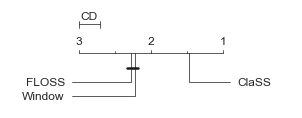

In [11]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=4, filename=f"../../figures/cd_comparative_{dataset}.pdf") # 

Let's compute wins/losses against ClaSP.

In [12]:
selection = "ClaSS"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs FLOSS: (wins/ties/losses): 107/1/27
ClaSS vs Window: (wins/ties/losses): 97/0/38


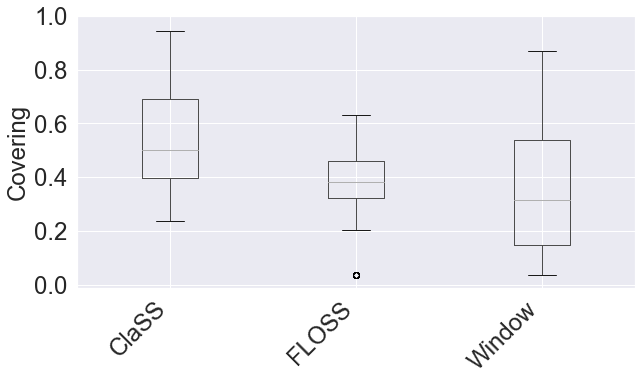

In [13]:
fontsize = 24
_, ax = plt.subplots(figsize=(10,5))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
ax.set_xticklabels(df_scores.columns[1:], rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0+.2,.2),1))
    
plt.savefig(f"../../figures/bp_comparative_{dataset}.pdf", bbox_inches="tight") 